C:\Users\pinak\Documents\GitHub\var-al


<IPython.core.display.Javascript object>


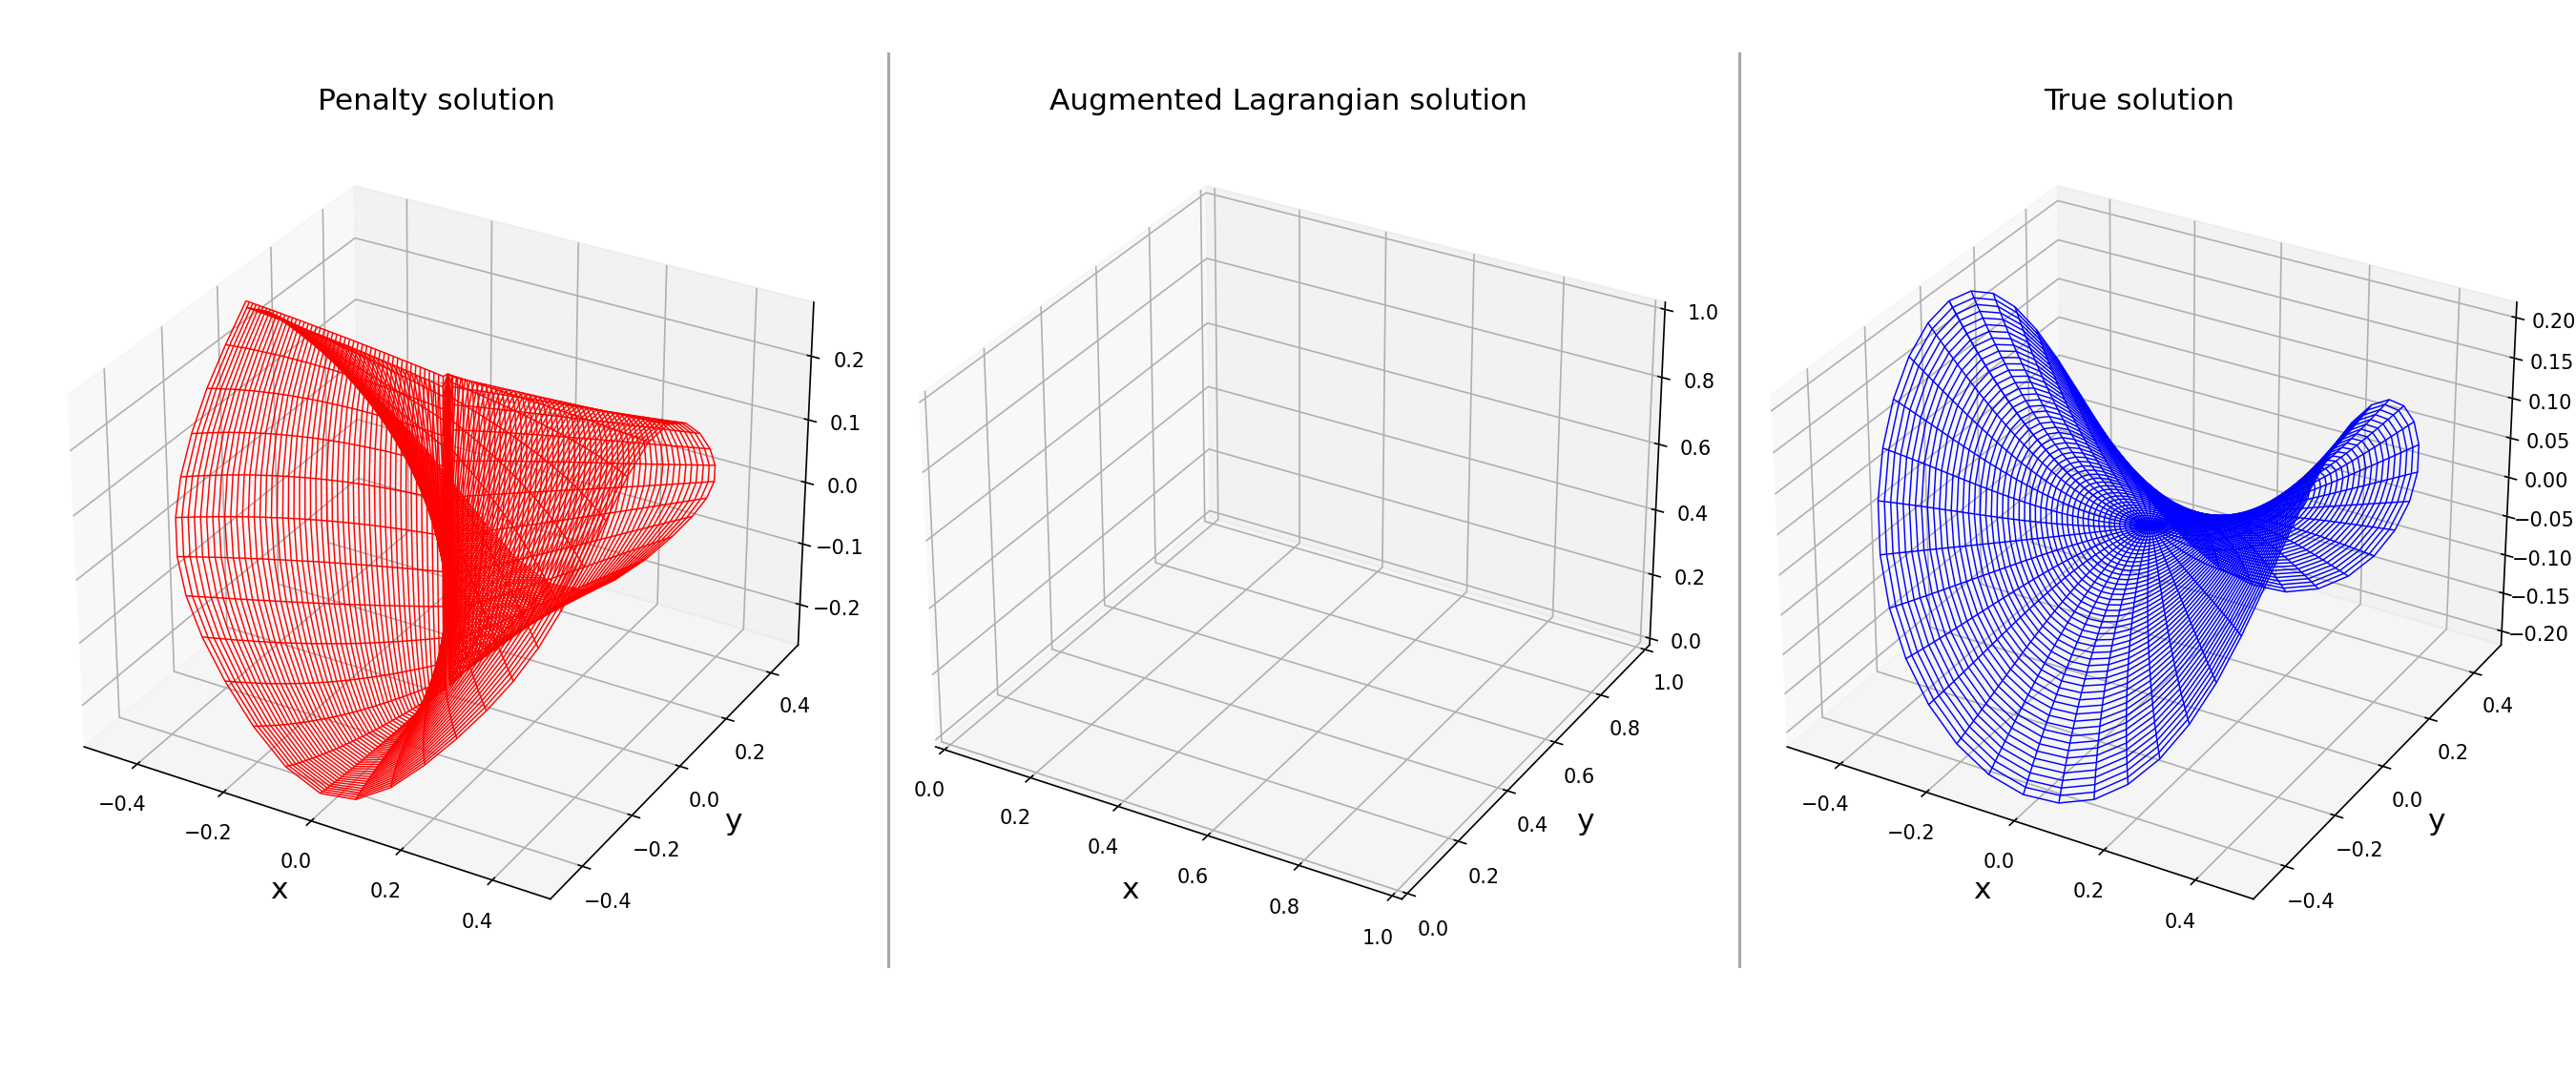

[[0.24412332 0.22218585 0.22352587 ... 0.26167277 0.26236558 0.26269817]
 [0.24412332 0.20684595 0.20777176 ... 0.2311334  0.23115212 0.23116058]
 [0.24412332 0.16986564 0.17091331 ... 0.18513939 0.184952   0.18440086]
 ...
 [0.24412332 0.14806396 0.14975518 ... 0.1873663  0.18742713 0.18742387]
 [0.24412332 0.18878499 0.190191   ... 0.22940573 0.22974384 0.23004527]
 [0.24412332 0.23857921 0.23944578 ... 0.27173623 0.27222866 0.2727839 ]]


In [11]:
# add folders to Python's search space
import os, sys
from pathlib import Path
script_dir = Path(os.path.dirname(os.path.abspath('')))
module_dir = str(script_dir)
sys.path.insert(0, module_dir + '/modules')
print(module_dir)

# import the rest of the modules
%matplotlib nbagg
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
import arch
import pandas as pd
DTYPE = 'float32'

# load learned solutions
net_p = arch.LSTMForgetNet(50, 3, DTYPE, name='Enneper', dim=3)
net_p.load_weights('../data/Enneper/{}'.format(net_p.name)).expect_partial()

# net_al =  arch.LSTMForgetNet(50, 3, DTYPE, name='Enneper-al', dim=3)
# net_al.load_weights('../data/Enneper-al/{}'.format(net_al.name)).expect_partial()

# define the true solution
def true(r, t):
    return r*r*np.cos(2.*t)

R = 0.5

# set up plotting parameters
scale = 0
xlabel_size = ylabel_size = 15 + scale
tick_size = 10 + scale
legend_size = 15 + scale
title_size = 15 + scale
cbar_tick_size = 10 + scale
line_color = "darkgrey"

# plot solutions
def plot_solutions(filename, resolution=50):
    fig = plt.figure(figsize=(18, 7.5))
    ax_p = fig.add_subplot(131, projection='3d')
    ax_al = fig.add_subplot(132, projection='3d')
    ax_t = fig.add_subplot(133, projection='3d')
    # plotting params  
    ax_p.tick_params(axis='both', which='major', labelsize=tick_size)
    ax_p.tick_params(axis='both', which='minor', labelsize=tick_size)
    ax_p.set_title('Penalty solution', fontsize=title_size)
    ax_p.set_xlabel('x', fontsize=xlabel_size)
    ax_p.set_ylabel('y', fontsize=ylabel_size)
    
    ax_al.tick_params(axis='both', which='major', labelsize=tick_size)
    ax_al.tick_params(axis='both', which='minor', labelsize=tick_size)
    ax_al.set_title('Augmented Lagrangian solution', fontsize=title_size)
    ax_al.set_xlabel('x', fontsize=xlabel_size)
    ax_al.set_ylabel('y', fontsize=ylabel_size)

    ax_t.tick_params(axis='both', which='major', labelsize=tick_size)
    ax_t.tick_params(axis='both', which='minor', labelsize=tick_size)
    ax_t.set_title('True solution', fontsize=title_size)
    ax_t.set_xlabel('x', fontsize=xlabel_size)
    ax_t.set_ylabel('y', fontsize=ylabel_size)

    
    r1 = np.linspace(0., R, num=resolution, endpoint=True).astype(DTYPE)
    t1 = np.linspace(-np.pi, np.pi, num=resolution, endpoint=True).astype(DTYPE)

    
    r1, t1 = np.meshgrid(r1, t1)
    
    x, y = r1*np.cos(t1) - r1*r1*r1*np.cos(3.*t1)/3., -r1*np.sin(t1) - r1*r1*r1*np.sin(3.*t1)/3.
    r = np.sqrt(x**2 + y**2)
    t = np.arctan2(y, x)
    z_p = net_p(r.reshape(-1, 1), t.reshape(-1, 1)).numpy()[:,-1]
#     z_al  = net_al(r.reshape(-1, 1), t.reshape(-1, 1)).numpy()[:, -1]
    z_t = true(r.reshape(-1, 1), t.reshape(-1, 1))
    grid = (resolution, resolution)
    z_p = z_p.reshape(grid)
#     z_al = z_al.reshape(grid)
    z_t = z_t.reshape(grid)
    ax_p.plot_wireframe(x, y, z_p, color='red', linewidth=0.7)
#     ax_al.plot_wireframe(x, y, z_al, color='magenta', linewidth=0.7)
    ax_t.plot_wireframe(x, y, z_t, color='blue', linewidth=0.7)
    # plot and save
    # fig.subplots_adjust(wspace=0.4, hspace=0.2)
    # Get the bounding boxes of the axes including text decorations
    l = 0.3
    line = plt.Line2D([l+.045,l+.045],[0.1,0.95], transform=fig.transFigure, color=line_color)
    fig.add_artist(line)
    l = 0.63
    line = plt.Line2D([l+.045,l+.045],[0.1,0.95], transform=fig.transFigure, color=line_color)
    fig.add_artist(line)
    fig.tight_layout()
    plt.savefig('{}.png'.format(filename), dpi=300)
    plt.show()
    print(z_p)

plot_solutions(filename='../plots/Enneper-surface')

<IPython.core.display.Javascript object>


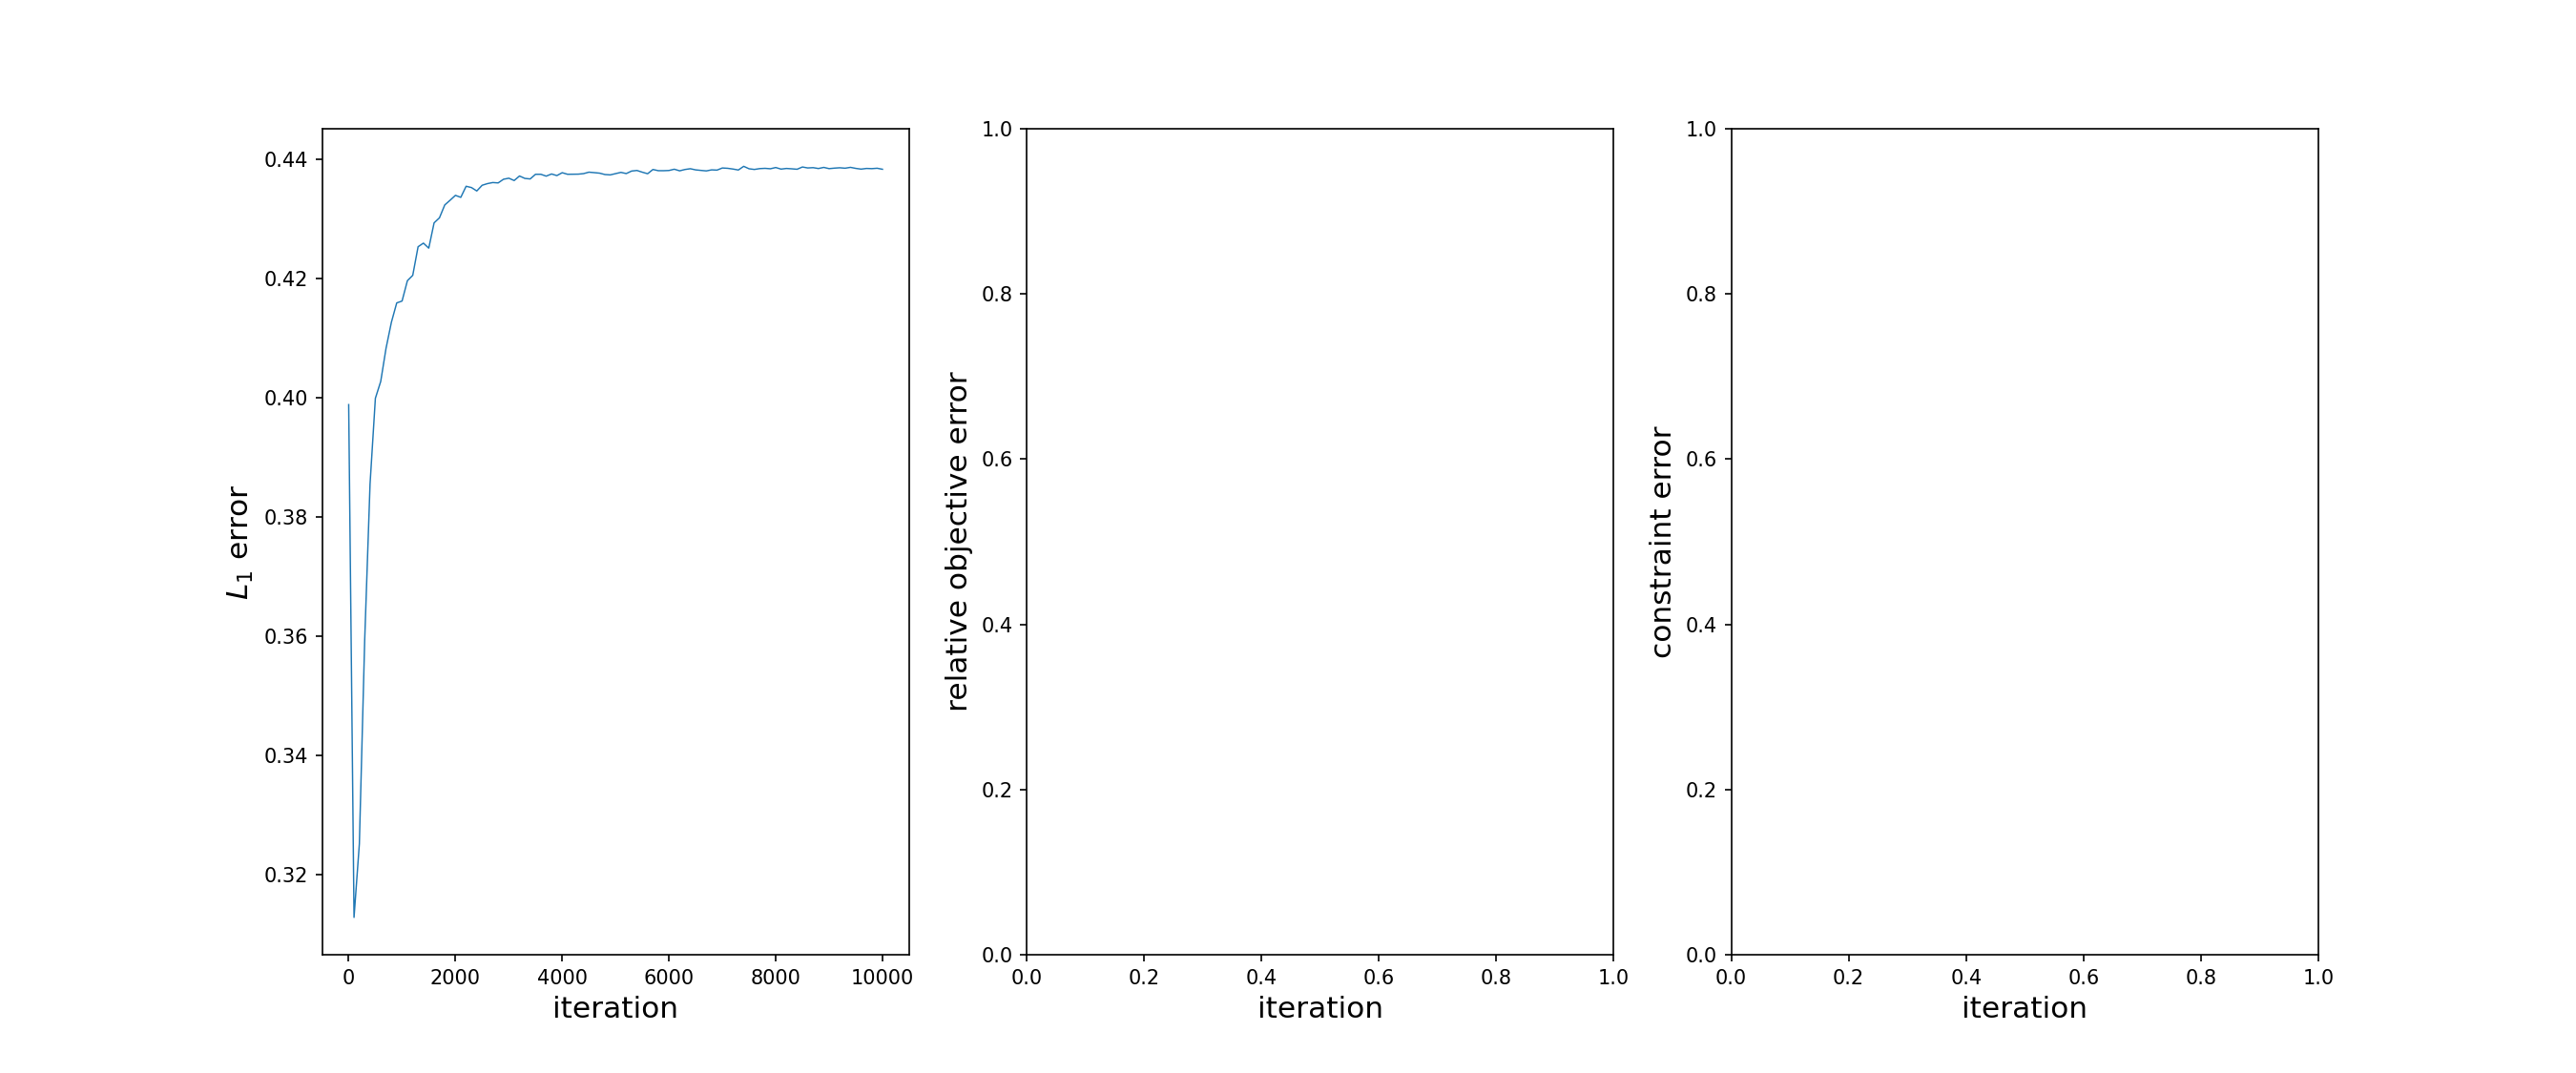

ValueError: x and y must have same first dimension, but have shapes (101,) and (501,)

In [10]:
def plot_errors(filename):
    fig = plt.figure(figsize=(18, 7.5))
    ax_l = fig.add_subplot(131)
    ax_o = fig.add_subplot(132)
    ax_c = fig.add_subplot(133)
    # plotting params  
    ax_l.tick_params(axis='both', which='major', labelsize=tick_size)
    ax_l.tick_params(axis='both', which='minor', labelsize=tick_size)
    #ax_l.set_title('Penalty solution', fontsize=title_size)
    ax_l.set_xlabel('iteration', fontsize=xlabel_size)
    ax_l.set_ylabel(r'$L_1$ error', fontsize=ylabel_size)
    
    ax_o.tick_params(axis='both', which='major', labelsize=tick_size)
    ax_o.tick_params(axis='both', which='minor', labelsize=tick_size)
    #ax_o.set_title('Augmented Lagrangian solution', fontsize=title_size)
    ax_o.set_xlabel('iteration', fontsize=xlabel_size)
    ax_o.set_ylabel('relative objective error', fontsize=ylabel_size)

    ax_c.tick_params(axis='both', which='major', labelsize=tick_size)
    ax_c.tick_params(axis='both', which='minor', labelsize=tick_size)
    #ax_c.set_title('True solution', fontsize=title_size)
    ax_c.set_xlabel('iteration', fontsize=xlabel_size)
    ax_c.set_ylabel('constraint error', fontsize=ylabel_size)

    
    df_p = pd.read_csv('../data/Enneper/train_log.csv')
    df_al = pd.read_csv('../data/Enneper-al/train_log.csv')

    x = df_p['iteration'].to_numpy()
    ax_l.plot(x, df_p['L1-error'].to_numpy(), linewidth=0.7, label='penalty')
    ax_l.plot(x, df_al['L1-error'].to_numpy(), linewidth=0.7, label='augmented Lagrangian')
    ax_l.legend(fontsize=legend_size)
    ax_o.plot(x, np.abs(df_p['objective-error'].to_numpy()), linewidth=0.7, label='penalty')
    ax_o.plot(x, np.abs(df_al['objective-error'].to_numpy()), linewidth=0.7, label='augmented Lagrangian')
    ax_o.legend(fontsize=legend_size)
#     ax_al.plot_surface(x, y, z_al, color='magenta', linewidth=0.7)
#     ax_t.plot_wireframe(x, y, z_t, color='blue', linewidth=0.7)
    # plot and save
    # fig.subplots_adjust(wspace=0.4, hspace=0.2)
    # Get the bounding boxes of the axes including text decorations
#     l = 0.3
#     line = plt.Line2D([l+.045,l+.045],[0.1,0.95], transform=fig.transFigure, color=line_color)
#     fig.add_artist(line)
#     l = 0.63
#     line = plt.Line2D([l+.045,l+.045],[0.1,0.95], transform=fig.transFigure, color=line_color)
#     fig.add_artist(line)
#     fig.tight_layout()
#     plt.savefig('{}.png'.format(filename), dpi=300)
#     plt.show()
    

plot_errors('../plots/Enneper-error')

In [9]:
z_p

NameError: name 'z_p' is not defined